# 데이터셋 로드

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import (
    train_test_split,
    RepeatedStratifiedKFold,
    RandomizedSearchCV,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, balanced_accuracy_score,
                             f1_score, roc_auc_score, log_loss,
                             top_k_accuracy_score)

# 샘플링 범위(무작위 탐색용)
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, top_k_accuracy_score


df = pd.read_csv('../dataset/csv/python_dataset.csv')

In [2]:
# Python Feature 및 데이터 로딩
features = [
    "avg_identifier_length",
    "average_function_length",
    "token_count",
    "function_count",
    "blank_ratio",
    "identifier_count",
    "total_lines",
    "code_size",
    "max_control_depth",
    "comment_ratio",
] + [f'codebert_{i}' for i in range(768)]

X = df[features]
# 이진 분류면 'label', 다중 분류면 'model'
y = df["model"]

le = LabelEncoder()               # 문자열 → 정수 라벨
y  = le.fit_transform(df["model"])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 시각화 함수

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

plt.rcParams['font.family'] = 'NanumGothic'

def plot_classification_report(y_true, y_pred, class_names, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    df_report = df_report.drop(columns=['support'], errors='ignore')

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"{model_name} - Classification Report")
    plt.show()

def plot_confusion(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# RF test

Top-1 accuracy : 0.792
Balanced acc. : 0.7040000000000001
Macro F1      : 0.7182152438326729
Weighted F1   : 0.7796083915826225
Top-2 accuracy: 0.93
Log-loss      : 0.7418482655203131
ROC-AUC macro : 0.9460810370370369


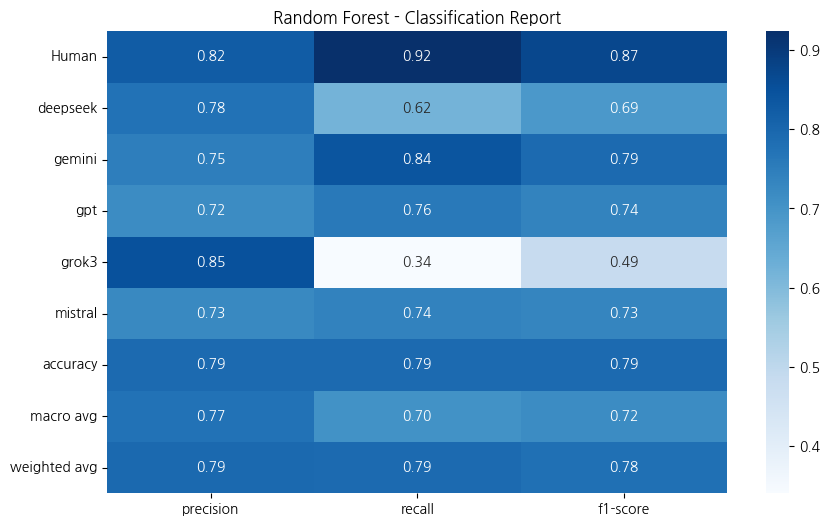

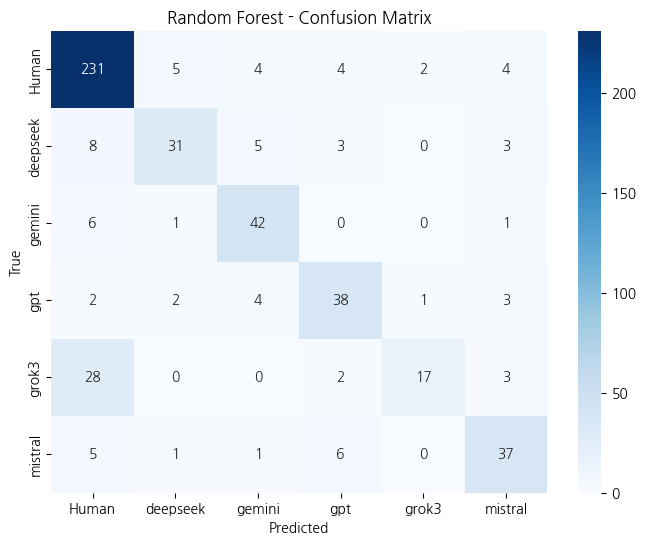

In [8]:
python_multilabel_classifier = joblib.load("../models/python_multilabel_classifier.joblib")
multiclassification_model = python_multilabel_classifier.get("model")
y_pred  = multiclassification_model.predict(X_test)
y_proba = multiclassification_model.predict_proba(X_test)

# 결과 출력
print("Top-1 accuracy :", accuracy_score(y_test, y_pred))
print("Balanced acc. :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1      :", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1   :", f1_score(y_test, y_pred, average='weighted'))
print("Top-2 accuracy:", top_k_accuracy_score(y_test, y_proba, k=2,
                                              labels=np.unique(y_test)))
print("Log-loss      :", log_loss(y_test, y_proba))
print("ROC-AUC macro :", roc_auc_score(y_test, y_proba,
                                       multi_class='ovr', average='macro'))

plot_classification_report(y_test, y_pred, le.classes_, "Random Forest")
plot_confusion(y_test, y_pred, le.classes_, "Random Forest")

# XGBoost Test

Top-1 accuracy : 0.846
Balanced acc. : 0.7566666666666667
Macro F1      : 0.7721085751657797
Weighted F1   : 0.8387440723025329
Top-2 accuracy: 0.938
Log-loss      : 0.4824542819733276
ROC-AUC macro : 0.9687454814814814


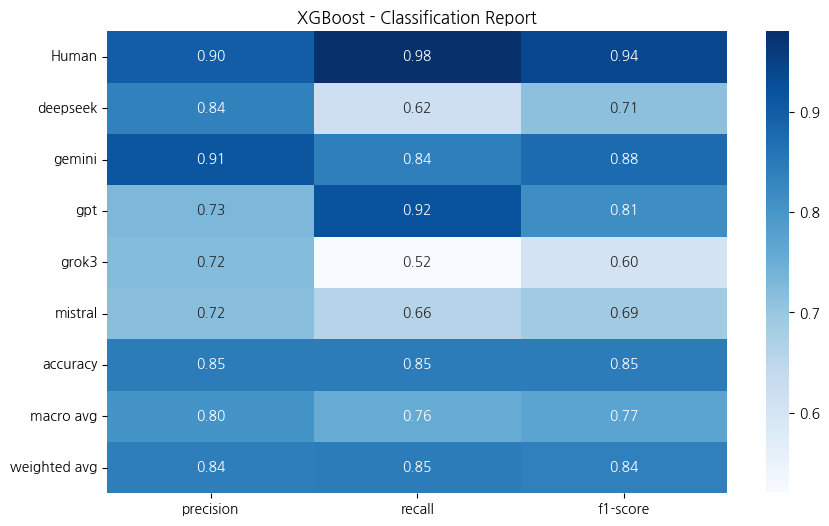

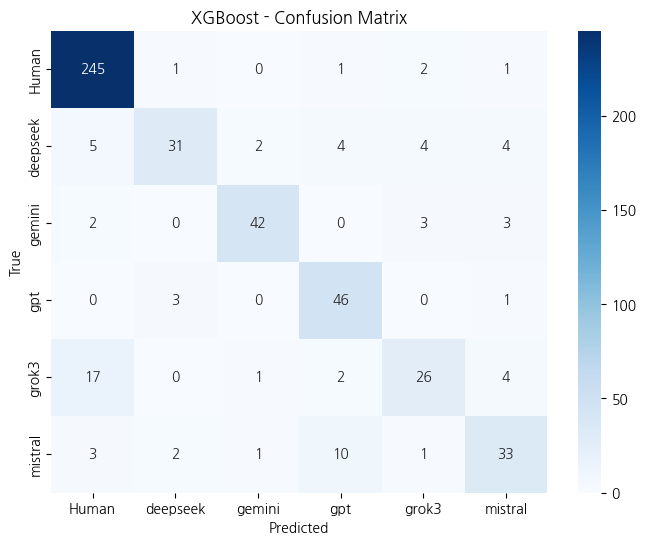

In [7]:
import joblib
python_multilabel_classifier = joblib.load("../models/python_xgb_top2.joblib")
y_pred  = python_multilabel_classifier.predict(X_test)
y_proba = python_multilabel_classifier.predict_proba(X_test)

# 결과 출력
print("Top-1 accuracy :", accuracy_score(y_test, y_pred))
print("Balanced acc. :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1      :", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1   :", f1_score(y_test, y_pred, average='weighted'))
print("Top-2 accuracy:", top_k_accuracy_score(y_test, y_proba, k=2,
                                              labels=np.unique(y_test)))
print("Log-loss      :", log_loss(y_test, y_proba))
print("ROC-AUC macro :", roc_auc_score(y_test, y_proba,
                                       multi_class='ovr', average='macro'))

plot_classification_report(y_test, y_pred, le.classes_, "XGBoost")
plot_confusion(y_test, y_pred, le.classes_, "XGBoost")

# SVM Test

Top-1 accuracy : 0.952
Balanced acc. : 0.9359999999999999
Macro F1      : 0.9418391342801359
Weighted F1   : 0.9516381340334279
Top-2 accuracy: 0.986
Log-loss      : 0.26433099722744174
ROC-AUC macro : 0.9950891851851851


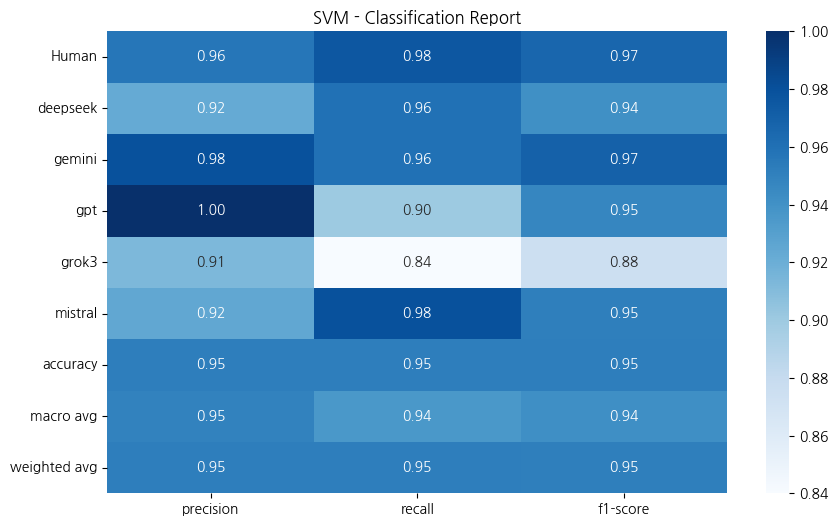

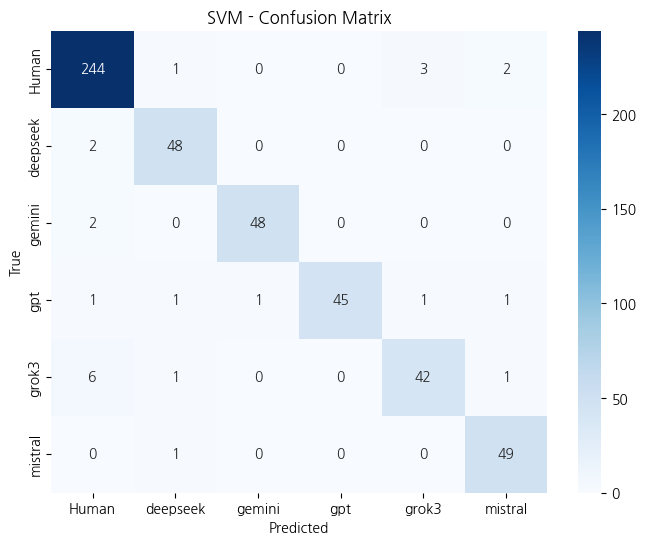

In [6]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
python_multilabel_classifier = joblib.load("../models/svm_python_multi_version2.joblib")
y_pred  = python_multilabel_classifier.predict(X_test)
y_proba = python_multilabel_classifier.predict_proba(X_test)

# 결과 출력
print("Top-1 accuracy :", accuracy_score(y_test, y_pred))
print("Balanced acc. :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1      :", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1   :", f1_score(y_test, y_pred, average='weighted'))
print("Top-2 accuracy:", top_k_accuracy_score(y_test, y_proba, k=2,
                                              labels=np.unique(y_test)))
print("Log-loss      :", log_loss(y_test, y_proba))
print("ROC-AUC macro :", roc_auc_score(y_test, y_proba,
                                       multi_class='ovr', average='macro'))

plot_classification_report(y_test, y_pred, le.classes_, "SVM")
plot_confusion(y_test, y_pred, le.classes_, "SVM")

# Matplotlib Assemble

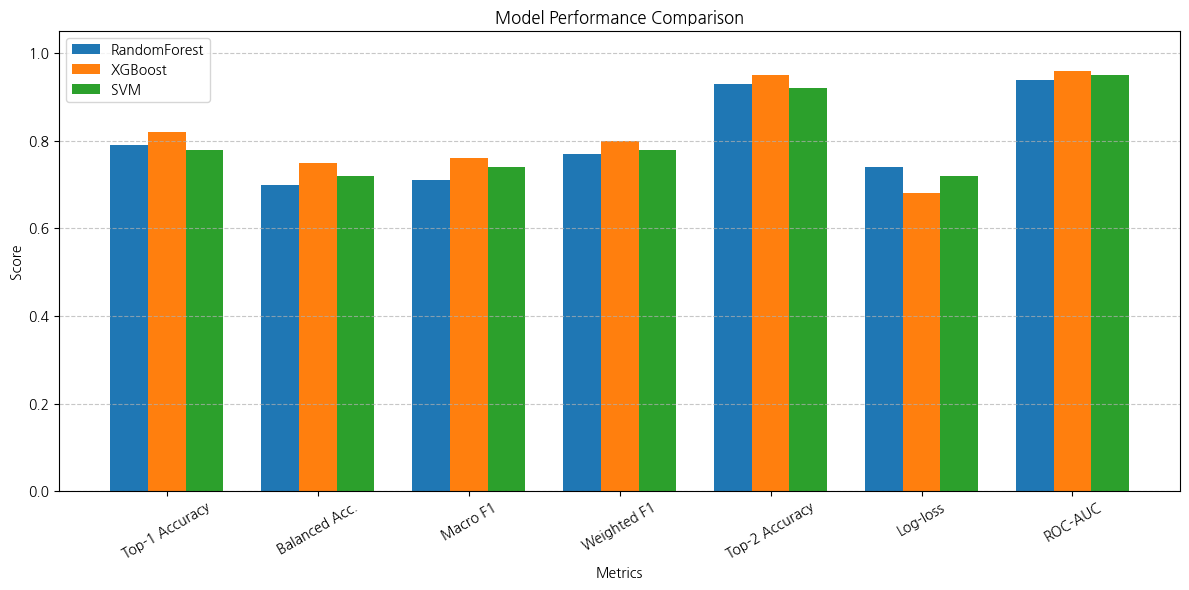

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 성능 지표 값 예시 (여기에 실제 측정값을 채워 넣으세요)
metrics = ['Top-1 Accuracy', 'Balanced Acc.', 'Macro F1', 'Weighted F1', 'Top-2 Accuracy', 'Log-loss', 'ROC-AUC']

random_forest_scores = [0.79, 0.70, 0.71, 0.77, 0.93, 0.74, 0.94]
xgboost_scores       = [0.82, 0.75, 0.76, 0.80, 0.95, 0.68, 0.96]
svm_scores           = [0.78, 0.72, 0.74, 0.78, 0.92, 0.72, 0.95]

# 바 차트용 위치 설정
x = np.arange(len(metrics))
width = 0.25

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(x - width, random_forest_scores, width, label='RandomForest')
plt.bar(x, xgboost_scores, width, label='XGBoost')
plt.bar(x + width, svm_scores, width, label='SVM')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics, rotation=30)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()